In [1]:
%cd ..

/Users/heilman/galvanize/recipe-vectorizer


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import pymongo
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from string import *
from src.functions import *
from src.modeling_functions import *
import keras
from keras.models import Sequential, Model, Input
from keras.layers import Dense, Dropout, Activation

Using TensorFlow backend.


In [3]:
recipes_coll = pymongo.MongoClient()['allrecipes']['recipes']
all_recipes = list(recipes_coll.find({'rating_info':{'$ne': None}}))
chili_recipes, chili_ratings = find_recipes_matching_search(recipes_coll, 'chili')

In [4]:
chili_df = create_dataframe(chili_recipes, cutoff=5)

In [17]:
means = pd.Series(index=chili_df.columns)

In [19]:
for col in chili_df.columns:
    means[col] = np.mean(chili_df[chili_df[col]!=0][col])

In [13]:
np.mean(chili_df['clove'])

0.0038159253003003006

In [14]:
np.mean(chili_df[chili_df['clove']!=0]['clove'])

0.18825231481481483

In [22]:
X = (chili_df / means).values

In [25]:
ratings = []
for rating in chili_ratings:
    ratings.append(rating['rating'])
y = np.array(ratings)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=427, test_size=0.3)

In [52]:
n_features = X.shape[1]
model = Sequential()
model.add(Dense(n_features,  activation='relu', input_shape=(n_features,)))
#model.add(Dense(50,    activation='relu'))
model.add(Dense(20,  activation='relu'))
model.add(Dropout(rate=0.5))
#model.add(Dense(3,  activation='relu'))
model.add(Dense(1,  activation='linear'))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [65]:
history = model.fit(X_train, y_train, batch_size=60, epochs=1000, verbose=None)

In [66]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [67]:
train_mse = mean_squared_error(train_preds, y_train)
test_mse = mean_squared_error(test_preds, y_test)

In [64]:
print('Train MSE :',train_mse)
print('Test MSE  :',test_mse)

Train MSE : 0.024207064493228906
Test MSE  : 0.31176215113352335


In [68]:
print('Train MSE :',train_mse)
print('Test MSE  :',test_mse)

Train MSE : 0.020359096480652938
Test MSE  : 0.3009345680188904


(array([ 8., 18., 35., 20.,  3.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([-0.42802668, -0.26136001, -0.09469334,  0.07197332,  0.23863999,
         0.40530666,  0.57197332,  0.73863999,  0.90530666,  1.07197332,
         1.23863999,  1.40530666,  1.57197332,  1.73863999,  1.90530666,
         2.07197332,  2.23863999,  2.40530666,  2.57197332,  2.73863999,
         2.90530666,  3.07197332,  3.23863999,  3.40530666,  3.57197332,
         3.73863999,  3.90530666,  4.07197332,  4.23863999,  4.40530666,
         4.57197332]),
 <a list of 30 Patch objects>)

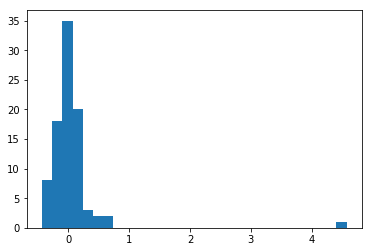

In [83]:
plt.hist(test_preds[0] - y_test, bins=30)

In [74]:
X_test[0].shape

(91,)